# Iris Report Example
The iris dataset is one of the most well known datasets in statistics and data science.
This example notebook shows how we can put together a simple data analysis report in esparto.


Specifically we will look at
* Text content with markdown formatting
* Including images from files
* Converting a Pandas DataFrame to a table
* Adding plots from Matplotlib and Seaborn

In [1]:
# Environment setup
import os
!pip install -Uqq esparto weasyprint
if os.environ.get("BINDER_SERVICE_HOST"):
    !pip install -Uqq pandas matplotlib seaborn

In [2]:
import esparto as es
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We start by instantiating a Page object that we will add content to.

In [3]:
my_page = es.Page(title="Iris Report")

## Text with Markdown Formatting
The text for this report has been taken from [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).
Note that the text contains markdown formatting that will be converted to HTML when it is rendered.

In [4]:
intro = """
The **Iris flower** data set, or Fisher's Iris data set, is a multivariate data set introduced by 
the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper 
'The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis'. 
It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify 
the morphologic variation of Iris flowers of three related species. Two of the three species were 
collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at 
the same time by the same person with the same apparatus".


The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and 
Iris versicolor). Four features were measured from each sample: the length and the width of the sepals 
and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear 
discriminant model to distinguish the species from each other.
"""
                    

credits = """\
<small><i>
Text retrieved from [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) on 2021-04-05  
License: [CC-BY-SA-3.0](https://en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike_3.0_Unported_License)  
</i></small>
  
<small><i>
Photo of Iris Virginica by Eric Hunt  
License: [CC-BY-SA-4.0](https://commons.wikimedia.org/wiki/Category:CC-BY-SA-4.0)
</i></small>
"""

We can immediately add and view the rendered content by using the `>>` operator. `esparto` automatically converts strings
to Markdown, unless the string points to an image path.

In [5]:
my_page["Introduction"] >> intro

<IPython.core.display.Javascript object>

{'Introduction': [{'Row 0': [{'Column 0': ['Markdown']}]}]}

To add additional content without a title we use the `+=` method to append in place.

In [6]:
my_page.introduction += credits

In [7]:
my_page.introduction

<IPython.core.display.Javascript object>

{'Introduction': [{'Row 0': [{'Column 0': ['Markdown']}]},
                  {'Row 1': [{'Column 0': ['Markdown']}]}]}

## Images
To add an image to the report, we pass the image file path as a string.
A caption and alternative text can also be provided.


Since the original image is rather large we set a maximum height with `.set_height()`.

In [8]:
!wget -q https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/480px-Iris_virginica_2.jpg \
-O iris-virginica.jpg

In [9]:
pic = "./iris-virginica.jpg"
iris_img = es.Image(pic, caption="Iris Virginica", alt_text=pic)
iris_img.set_height(250)


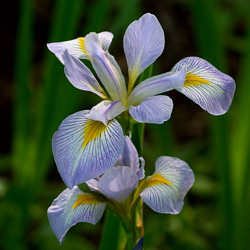

<IPython.core.display.Javascript object>

In [10]:
iris_img

Now that we've finished our Introduction section, we should check that it looks as intended.


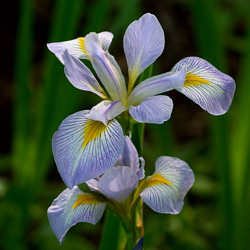

<IPython.core.display.Javascript object>

{'Introduction': [{'Row 0': [{'Column 0': ['Markdown']},
                             {'Column 1': ['Image']}]},
                  {'Row 1': [{'Column 0': ['Markdown']}]}]}

In [11]:
my_page.introduction[0] += iris_img
my_page.introduction

## Pandas DataFrames
For the Analysis section we will include a table of sample data from a Pandas DataFrame and a couple of visualisations 
produced in MatplotLib and Seaborn.

The data set is downloaded from GitHub and read in with the usual Pandas API.

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
sample_df = df.sample(10, random_state=1)

Using the `<<` operator adds content to the page but returns the original object.

We explicitly call the `DataFramePD` class so that we can hide the index.

In [13]:
my_page["Analysis"]["Sample Data"] << es.DataFramePd(sample_df, index=False)

sepal_length,sepal_width,petal_length,petal_width,species
5.8,4.0,1.2,0.2,setosa
5.1,2.5,3.0,1.1,versicolor
6.6,3.0,4.4,1.4,versicolor
5.4,3.9,1.3,0.4,setosa
7.9,3.8,6.4,2.0,virginica
6.3,3.3,4.7,1.6,versicolor
6.9,3.1,5.1,2.3,virginica
5.1,3.8,1.9,0.4,setosa
4.7,3.2,1.6,0.2,setosa
6.9,3.2,5.7,2.3,virginica


<IPython.core.display.Javascript object>

## Plotting with Matplotlib and Seaborn

We can pass a Matplotlib figure directly to any `Layout` object. Matplotlib figures are converted to SVG format for HTML and PDF output. In the notebook environment, however, they are rendered as PNG images. Figures with many elements can take a long time
to display as SVG. This behaviour can be configured through `es.options.matplotlib_notebook_format`.

In [14]:
es.options.matplotlib_notebook_format

'png'

In [15]:
sns.set_palette("colorblind")
sns.set_style("white")

In [16]:
df.species = df.species.astype("category")

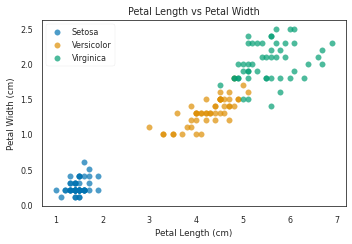

In [17]:
plt.style.use("seaborn-paper")
fig1, ax = plt.subplots(figsize=[5, 3.5])

for i, s in enumerate(df.species.cat.categories):
    plot_data = df.loc[df.species == s]
    ax.scatter(plot_data.petal_length, plot_data.petal_width, alpha=0.7, c=f"C{i}", label=s.capitalize())

ax.set_title("Petal Length vs Petal Width")
ax.set_xlabel("Petal Length (cm)")
ax.set_ylabel("Petal Width (cm)")
ax.legend()
fig1.tight_layout();

In [18]:
my_page["Analysis"]["Visualisation"] = fig1

For some plots we may need to get the figure by calling `plt.gcf()` (get current figure), as shown below.

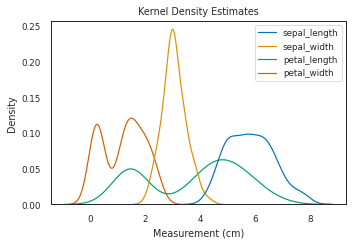

In [19]:
sns.set_context("paper")
ax = sns.kdeplot(data=df)
ax.set_title("Kernel Density Estimates")
ax.set_xlabel("Measurement (cm)")
fig2 = plt.gcf()
fig2.set_size_inches((5, 3.5))
plt.tight_layout()


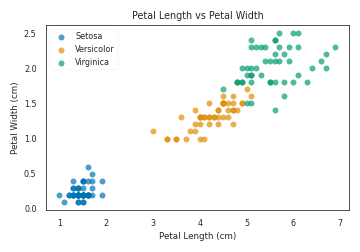
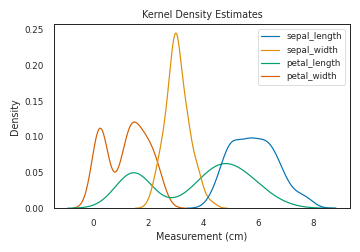

<IPython.core.display.Javascript object>

{'Visualisation': [{'Column 0': ['FigureMpl']}, {'Column 1': ['FigureMpl']}]}

In [20]:
my_page.analysis.visualisation += fig2
my_page.analysis.visualisation

## Checking the Finished Page

We can preview the final page rendering within the notebook.

sepal_length,sepal_width,petal_length,petal_width,species
5.8,4.0,1.2,0.2,setosa
5.1,2.5,3.0,1.1,versicolor
6.6,3.0,4.4,1.4,versicolor
5.4,3.9,1.3,0.4,setosa
7.9,3.8,6.4,2.0,virginica
6.3,3.3,4.7,1.6,versicolor
6.9,3.1,5.1,2.3,virginica
5.1,3.8,1.9,0.4,setosa
4.7,3.2,1.6,0.2,setosa
6.9,3.2,5.7,2.3,virginica

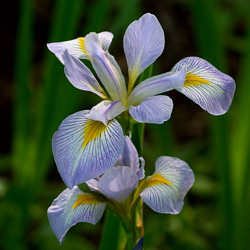
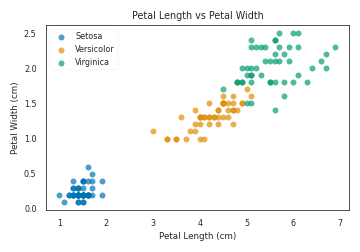
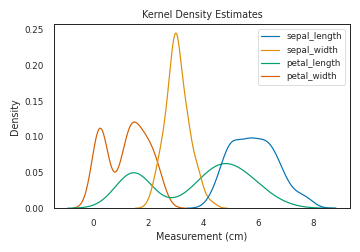

<IPython.core.display.Javascript object>

{'Iris Report': [{'Introduction': [{'Row 0': [{'Column 0': ['Markdown']},
                                              {'Column 1': ['Image']}]},
                                   {'Row 1': [{'Column 0': ['Markdown']}]}]},
                 {'Analysis': [{'Sample Data': [{'Column 0': ['DataFramePd']}]},
                               {'Visualisation': [{'Column 0': ['FigureMpl']},
                                                  {'Column 1': ['FigureMpl']}]}]}]}

In [21]:
my_page

The page can now be saved as HTML or PDF.

In [22]:
page_name = "iris-report.html"
my_page.save_html("iris-report.html")
my_page.save_pdf("iris-report.pdf")